# Pattern Mining for Error Logs

## Functions

In [1]:
# read csv files and modify
import pandas as pd
import matplotlib.pyplot as plt
# import the functions we have written
from pattern_mining import search, analyze, count_fails, count_msg
from IPython.display import HTML

## Search for Patterns

Search patterns for given range. Usually we get 10% error from these tests, and it is easier to detect some patterns when searching in small ranges (like 500 tests).

We get a lot of patterns therefore we need to eliminate some of the redundant patterns. However, at the output we will also display the most observed patterns before elimination. Then, we will display all the patterns we have found after the elimination.

In [2]:
try:
    f, f_before = search(True)
    print("Patterns before elimination:")
    display(f_before.head())
    print("Patterns after elimination:")
    display(f)
except:
    pass

Search between 25483 and 25621 

No data found. Give appropriate start and end ID values.


**NOTE: SupportPerc value is the ratio of how many times the pattern occurred and the total amount of FAILED test cases. Maximum value is 1.**

## Detailed Analysis

Let's analyze 2 patterns in detail.

In [3]:
# first, import the modified dataframe

dt = pd.read_csv("modified_dataframe.csv")
dt.set_index("Unnamed: 0", inplace=True)
dt.index.name = None

### First pattern before elimination

Here, we will make a detailed analysis on the most observed pattern before eliminating patterns.

In [4]:
try:
    if len(f_before) > 0:
        found_f = analyze(f_before.iloc[0], dt)
        print("Tests that have failed because of this pattern")
        display(found_f)
except:
    pass

### First pattern after elimination

Here, we will make a detailed analysis on the most observed pattern after eliminating redundant patterns.

In [5]:
try:
    if len(f) > 0:
        found_f = analyze(f.iloc[0], dt)
        print("Tests that have failed because of this pattern")
        display(found_f)
except:
    pass

## Version Analysis

Let's compare the Meridio, TAPA, NSM, and Kubernetes versions for all cases and for error cases, to see which versions are more likely to produce errors.

### Meridio Version

<Axes: title={'center': 'Error cases'}, xlabel='MERIDIO_VERSION'>

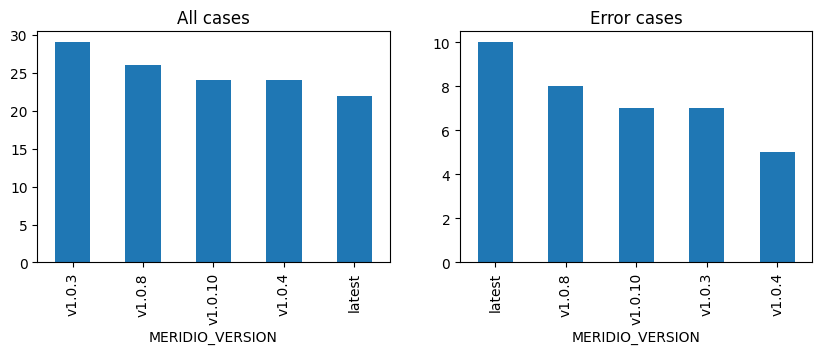

In [6]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("All cases")
dt.MERIDIO_VERSION.value_counts().plot(kind='bar')

err_df = dt[dt.RESULT == "FAILURE"]
plt.subplot(1,2,2)
plt.title("Error cases")
vals = err_df.MERIDIO_VERSION.value_counts()
sel = vals.index[0]
vals.plot(kind='bar')

In [7]:
print("Results for Meridio Version:", sel)
print(dt[dt.MERIDIO_VERSION == sel].RESULT.value_counts())

Results for Meridio Version: latest
RESULT
SUCCESS    12
FAILURE    10
Name: count, dtype: int64


In [8]:
print("Failed test runs for Meridio Version:", sel)
display(dt[(dt.MERIDIO_VERSION == sel) & (dt.RESULT == "FAILURE")])

Failed test runs for Meridio Version: latest


,MERIDIO_VERSION,TAPA_VERSION,BUILD_ID,NSM_VERSION,KUBERNETES_VERSION,IP_FAMILY,RESULT,TIME,E-All targets with the stream opened should have received traffic,E-Timed out after,...,F-flow-byte-matches,F-flow-destination-ports-range,F-flow-priority,F-new-attractor-nsm-vlan,F-new-flow,F-new-stream,F-new-vip,F-open-second-stream,F-open-second-stream-second-conduit,F-stream-max-targets
13259,latest,latest,25490,v1.5.0,v1.25,ipv4,FAILURE,2023-07-25T23:39:58.551277059Z,1,1,...,0,0,0,1,0,0,0,1,0,0
13267,latest,v1.0.4,25499,v1.7.1,v1.21,ipv4,FAILURE,2023-07-26T03:59:52.294443568Z,1,0,...,0,0,0,0,0,0,0,0,0,0
13312,latest,v1.0.4,25545,v1.8.0,v1.25,dualstack,FAILURE,2023-07-26T17:19:36.002970565Z,1,0,...,0,0,0,0,0,0,0,0,0,0
13341,latest,latest,25577,v1.5.0,v1.26,ipv6,FAILURE,2023-07-26T23:55:24.393090714Z,1,1,...,0,1,0,1,0,1,1,1,1,0
13352,latest,v1.0.3,25589,v1.8.0,v1.27,ipv4,FAILURE,2023-07-27T03:56:22.77724374Z,0,0,...,0,0,0,0,0,0,0,0,0,1
13355,latest,v1.0.3,25592,v1.5.0,v1.25,dualstack,FAILURE,2023-07-27T04:32:52.854153269Z,0,0,...,0,0,0,1,0,0,0,0,0,0
13367,latest,v1.0.10,25605,v1.9.0,v1.23,dualstack,FAILURE,2023-07-27T10:46:38.857947553Z,0,0,...,0,0,0,0,0,0,0,0,0,1
13370,latest,v1.0.3,25608,v1.7.1,v1.23,ipv6,FAILURE,2023-07-27T11:59:01.226921407Z,0,1,...,0,0,0,0,0,0,0,0,1,0
13375,latest,v1.0.4,25616,v1.5.0,v1.25,ipv6,FAILURE,2023-07-27T18:22:02.37959797Z,1,1,...,1,0,0,0,0,1,0,0,1,0
13379,latest,latest,25621,v1.6.0,v1.25,dualstack,FAILURE,2023-07-31T06:57:12.733822409Z,1,1,...,0,1,0,1,1,0,0,0,0,0


In [9]:
print("Failed tests for Meridio Version:", sel)
display(count_fails(dt[dt.MERIDIO_VERSION == sel]))

Failed tests for Meridio Version: latest


new-attractor-nsm-vlan               4
open-second-stream-second-conduit    3
stream-max-targets                   2
Scale-Up                             2
open-second-stream                   2
UDP-IPv4                             2
new-stream                           2
Scale-Down                           2
flow-destination-ports-range         2
new-vip                              1
new-flow                             1
MT-Parallel                          1
conduit-destination-port-nats        1
close-open                           1
UDP-IPv6                             1
TCP-IPv6                             1
TCP-IPv4                             1
flow-byte-matches                    1
dtype: int64

In [10]:
print("Error messages for Meridio Version:", sel)
display(count_msg(dt[dt.MERIDIO_VERSION == sel]))

Error messages for Meridio Version: latest


All targets with the stream opened should have received traffic    6
Timed out after                                                    5
command terminated with exit code 143                              2
a vip cannot be shared between 2 conduits in this version          1
dtype: int64

### TAPA Version

<Axes: title={'center': 'Error cases'}, xlabel='TAPA_VERSION'>

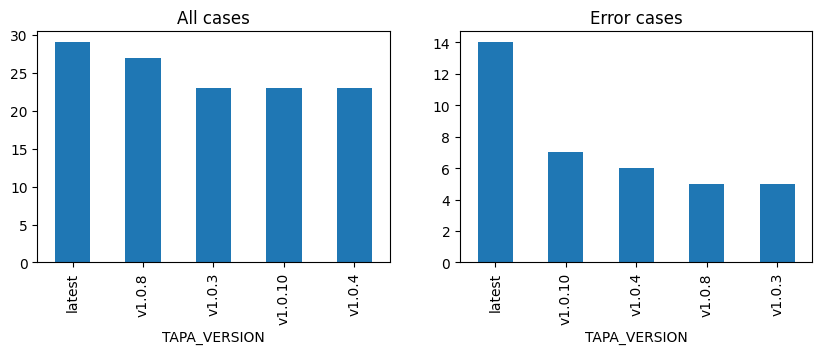

In [11]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("All cases")
dt.TAPA_VERSION.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Error cases")
vals = err_df.TAPA_VERSION.value_counts()
sel = vals.index[0]
vals.plot(kind='bar')

In [12]:
print("Results for TAPA Version:", sel)
print(dt[dt.TAPA_VERSION == sel].RESULT.value_counts())

Results for TAPA Version: latest
RESULT
SUCCESS    15
FAILURE    14
Name: count, dtype: int64


In [13]:
print("Failed test runs for TAPA Version:", sel)
display(dt[(dt.TAPA_VERSION == sel) & (dt.RESULT == "FAILURE")])

Failed test runs for TAPA Version: latest


,MERIDIO_VERSION,TAPA_VERSION,BUILD_ID,NSM_VERSION,KUBERNETES_VERSION,IP_FAMILY,RESULT,TIME,E-All targets with the stream opened should have received traffic,E-Timed out after,...,F-flow-byte-matches,F-flow-destination-ports-range,F-flow-priority,F-new-attractor-nsm-vlan,F-new-flow,F-new-stream,F-new-vip,F-open-second-stream,F-open-second-stream-second-conduit,F-stream-max-targets
13253,v1.0.10,latest,25483,v1.6.1,v1.26,ipv4,FAILURE,2023-07-25T20:34:40.529779211Z,1,1,...,0,0,1,1,0,0,0,0,0,1
13259,latest,latest,25490,v1.5.0,v1.25,ipv4,FAILURE,2023-07-25T23:39:58.551277059Z,1,1,...,0,0,0,1,0,0,0,1,0,0
13260,v1.0.4,latest,25491,v1.6.1,v1.23,ipv4,FAILURE,2023-07-26T00:44:16.20029581Z,1,1,...,1,0,1,0,0,0,0,0,0,0
13266,v1.0.8,latest,25498,v1.5.0,v1.25,dualstack,FAILURE,2023-07-26T02:54:46.972128296Z,1,1,...,1,0,0,0,0,1,0,0,0,0
13290,v1.0.8,latest,25522,v1.5.0,v1.21,ipv6,FAILURE,2023-07-26T07:52:54.266086447Z,1,1,...,1,0,0,1,0,0,1,0,1,0
13296,v1.0.8,latest,25528,v1.6.0,v1.26,dualstack,FAILURE,2023-07-26T09:48:06.702791942Z,1,1,...,0,1,1,0,1,0,0,0,0,1
13300,v1.0.3,latest,25533,v1.6.1,v1.27,ipv6,FAILURE,2023-07-26T11:39:02.245000566Z,1,1,...,0,0,0,0,0,1,1,1,1,1
13306,v1.0.10,latest,25539,v1.6.0,v1.24,ipv4,FAILURE,2023-07-26T14:29:54.365741299Z,1,1,...,1,1,1,0,0,0,1,0,1,0
13314,v1.0.3,latest,25547,v1.7.1,v1.25,dualstack,FAILURE,2023-07-26T17:46:21.011111098Z,1,0,...,0,0,0,0,0,0,0,0,0,0
13341,latest,latest,25577,v1.5.0,v1.26,ipv6,FAILURE,2023-07-26T23:55:24.393090714Z,1,1,...,0,1,0,1,0,1,1,1,1,0


In [14]:
print("Failed tests for TAPA Version:", sel)
display(count_fails(dt[dt.TAPA_VERSION == sel]))

Failed tests for TAPA Version: latest


close-open                           9
new-attractor-nsm-vlan               6
open-second-stream-second-conduit    6
UDP-IPv4                             6
flow-byte-matches                    5
Scale-Up                             5
new-vip                              5
flow-priority                        5
new-flow                             4
flow-destination-ports-range         4
open-second-stream                   3
new-stream                           3
MT-Parallel                          3
MT-Switch                            3
conduit-destination-port-nats        3
UDP-IPv6                             3
TCP-IPv4                             3
Scale-Down                           3
stream-max-targets                   3
dtype: int64

In [15]:
print("Error messages for TAPA Version:", sel)
display(count_msg(dt[dt.TAPA_VERSION == sel]))

Error messages for TAPA Version: latest


All targets with the stream opened should have received traffic    14
Timed out after                                                    13
a vip cannot be shared between 2 conduits in this version           2
a vip cannot be shared between 2 attractors in this version         1
command terminated with exit code 143                               1
dtype: int64

### NSM Version

<Axes: title={'center': 'Error cases'}, xlabel='NSM_VERSION'>

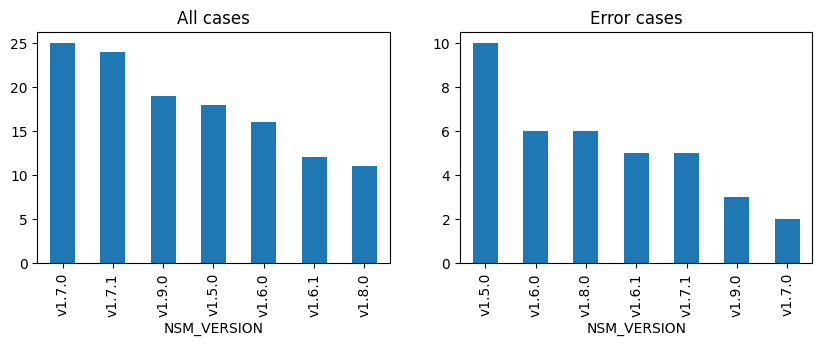

In [16]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("All cases")
dt.NSM_VERSION.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Error cases")
vals = err_df.NSM_VERSION.value_counts()
sel = vals.index[0]
vals.plot(kind='bar')

In [17]:
print("Results for NSM Version:", sel)
print(dt[dt.NSM_VERSION == sel].RESULT.value_counts())

Results for NSM Version: v1.5.0
RESULT
FAILURE    10
SUCCESS     8
Name: count, dtype: int64


In [18]:
print("Failed test runs for NSM Version:", sel)
display(dt[(dt.NSM_VERSION == sel) & (dt.RESULT == "FAILURE")])

Failed test runs for NSM Version: v1.5.0


,MERIDIO_VERSION,TAPA_VERSION,BUILD_ID,NSM_VERSION,KUBERNETES_VERSION,IP_FAMILY,RESULT,TIME,E-All targets with the stream opened should have received traffic,E-Timed out after,...,F-flow-byte-matches,F-flow-destination-ports-range,F-flow-priority,F-new-attractor-nsm-vlan,F-new-flow,F-new-stream,F-new-vip,F-open-second-stream,F-open-second-stream-second-conduit,F-stream-max-targets
13256,v1.0.4,v1.0.10,25486,v1.5.0,v1.26,ipv6,FAILURE,2023-07-25T21:58:35.614912967Z,1,1,...,0,0,0,1,0,0,0,0,0,0
13259,latest,latest,25490,v1.5.0,v1.25,ipv4,FAILURE,2023-07-25T23:39:58.551277059Z,1,1,...,0,0,0,1,0,0,0,1,0,0
13266,v1.0.8,latest,25498,v1.5.0,v1.25,dualstack,FAILURE,2023-07-26T02:54:46.972128296Z,1,1,...,1,0,0,0,0,1,0,0,0,0
13290,v1.0.8,latest,25522,v1.5.0,v1.21,ipv6,FAILURE,2023-07-26T07:52:54.266086447Z,1,1,...,1,0,0,1,0,0,1,0,1,0
13341,latest,latest,25577,v1.5.0,v1.26,ipv6,FAILURE,2023-07-26T23:55:24.393090714Z,1,1,...,0,1,0,1,0,1,1,1,1,0
13344,v1.0.4,v1.0.3,25581,v1.5.0,v1.23,ipv4,FAILURE,2023-07-27T01:37:38.005208951Z,0,0,...,0,0,0,0,0,0,0,0,0,1
13355,latest,v1.0.3,25592,v1.5.0,v1.25,dualstack,FAILURE,2023-07-27T04:32:52.854153269Z,0,0,...,0,0,0,1,0,0,0,0,0,0
13371,v1.0.4,v1.0.4,25609,v1.5.0,v1.27,dualstack,FAILURE,2023-07-27T12:17:47.806961468Z,1,0,...,0,0,1,0,0,0,0,0,0,0
13373,v1.0.3,v1.0.10,25614,v1.5.0,v1.23,dualstack,FAILURE,2023-07-27T16:09:52.481494616Z,1,1,...,0,0,0,0,0,1,0,0,1,0
13375,latest,v1.0.4,25616,v1.5.0,v1.25,ipv6,FAILURE,2023-07-27T18:22:02.37959797Z,1,1,...,1,0,0,0,0,1,0,0,1,0


In [19]:
print("Failed tests for NSM Version:", sel)
display(count_fails(dt[dt.NSM_VERSION == sel]))

Failed tests for NSM Version: v1.5.0


new-attractor-nsm-vlan               5
MT-Switch                            4
open-second-stream-second-conduit    4
new-stream                           4
Scale-Down                           3
close-open                           3
flow-byte-matches                    3
conduit-destination-port-nats        2
new-vip                              2
Scale-Up                             2
TCP-IPv4                             2
TCP-IPv6                             2
UDP-IPv4                             2
UDP-IPv6                             2
open-second-stream                   2
MT-Parallel                          1
flow-priority                        1
flow-destination-ports-range         1
stream-max-targets                   1
dtype: int64

In [20]:
print("Error messages for NSM Version:", sel)
display(count_msg(dt[dt.NSM_VERSION == sel]))

Error messages for NSM Version: v1.5.0


All targets with the stream opened should have received traffic    8
Timed out after                                                    7
a vip cannot be shared between 2 conduits in this version          3
command terminated with exit code 143                              1
dtype: int64

### Kubernetes Version

<Axes: title={'center': 'Error cases'}, xlabel='KUBERNETES_VERSION'>

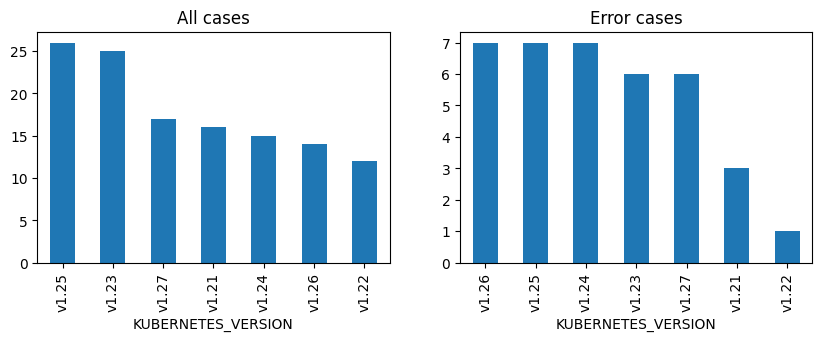

In [21]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("All cases")
dt.KUBERNETES_VERSION.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Error cases")
vals = err_df.KUBERNETES_VERSION.value_counts()
sel = vals.index[0]
vals.plot(kind='bar')

In [22]:
print("Results for Kubernetes Version:", sel)
print(dt[dt.KUBERNETES_VERSION == sel].RESULT.value_counts())

Results for Kubernetes Version: v1.26
RESULT
FAILURE    7
SUCCESS    7
Name: count, dtype: int64


In [23]:
print("Failed test runs for Kubernetes Version:", sel)
display(dt[(dt.KUBERNETES_VERSION == sel) & (dt.RESULT == "FAILURE")])

Failed test runs for Kubernetes Version: v1.26


,MERIDIO_VERSION,TAPA_VERSION,BUILD_ID,NSM_VERSION,KUBERNETES_VERSION,IP_FAMILY,RESULT,TIME,E-All targets with the stream opened should have received traffic,E-Timed out after,...,F-flow-byte-matches,F-flow-destination-ports-range,F-flow-priority,F-new-attractor-nsm-vlan,F-new-flow,F-new-stream,F-new-vip,F-open-second-stream,F-open-second-stream-second-conduit,F-stream-max-targets
13253,v1.0.10,latest,25483,v1.6.1,v1.26,ipv4,FAILURE,2023-07-25T20:34:40.529779211Z,1,1,...,0,0,1,1,0,0,0,0,0,1
13256,v1.0.4,v1.0.10,25486,v1.5.0,v1.26,ipv6,FAILURE,2023-07-25T21:58:35.614912967Z,1,1,...,0,0,0,1,0,0,0,0,0,0
13294,v1.0.3,v1.0.8,25526,v1.7.0,v1.26,ipv6,FAILURE,2023-07-26T09:24:11.162126319Z,1,0,...,0,0,0,0,0,0,0,0,1,0
13296,v1.0.8,latest,25528,v1.6.0,v1.26,dualstack,FAILURE,2023-07-26T09:48:06.702791942Z,1,1,...,0,1,1,0,1,0,0,0,0,1
13341,latest,latest,25577,v1.5.0,v1.26,ipv6,FAILURE,2023-07-26T23:55:24.393090714Z,1,1,...,0,1,0,1,0,1,1,1,1,0
13347,v1.0.10,v1.0.10,25584,v1.6.1,v1.26,ipv6,FAILURE,2023-07-27T02:12:42.846538844Z,1,1,...,1,0,0,0,0,1,0,0,0,1
13372,v1.0.10,latest,25610,v1.6.0,v1.26,ipv4,FAILURE,2023-07-27T12:54:15.030567738Z,1,1,...,0,0,0,0,1,0,0,0,1,0


In [24]:
print("Failed tests for Kubernetes Version:", sel)
display(count_fails(dt[dt.KUBERNETES_VERSION == sel]))

Failed tests for Kubernetes Version: v1.26


MT-Switch                            4
close-open                           3
open-second-stream-second-conduit    3
new-attractor-nsm-vlan               3
Scale-Down                           3
stream-max-targets                   3
UDP-IPv4                             2
flow-priority                        2
new-flow                             2
new-stream                           2
Scale-Up                             2
flow-destination-ports-range         2
UDP-IPv6                             1
conduit-destination-port-nats        1
flow-byte-matches                    1
TCP-IPv4                             1
new-vip                              1
open-second-stream                   1
dtype: int64

In [25]:
print("Error messages for Kubernetes Version:", sel)
display(count_msg(dt[dt.KUBERNETES_VERSION == sel]))

Error messages for Kubernetes Version: v1.26


All targets with the stream opened should have received traffic    7
Timed out after                                                    6
a vip cannot be shared between 2 conduits in this version          1
dtype: int64